# Logistic Regression in Python

## Table of Contents

### Introduction

### Classification
- What Is Classification?
- When Do You Need Classification?

### Logistic Regression Overview
- Math Prerequisites
- Problem Formulation
- Methodology
- Classification Performance
- Single-Variate Logistic Regression
- Multi-Variate Logistic Regression
- Regularization

### Logistic Regression in Python
- Logistic Regression Python Packages
- Logistic Regression in Python With scikit-learn: Example 1
- Logistic Regression in Python With scikit-learn: Example 2
- Logistic Regression in Python With StatsModels: Example
- Logistic Regression in Python: Handwriting Recognition
- Beyond Logistic Regression in Python

### Conclusion


## Introduction

As the amount of available data, the strength of computing power, and the number of algorithmic improvements continue to rise, so does the importance of data science and machine learning. Classification is among the most important areas of machine learning, and logistic regression is one of its basic methods. By the end of this tutorial, you’ll have learned about classification in general and the fundamentals of logistic regression in particular, as well as how to implement logistic regression in Python.

In this tutorial, you’ll learn:
- What logistic regression is
- What logistic regression is used for
- How logistic regression works
- How to implement logistic regression in Python, step by step




## Classification
[Classification](https://en.wikipedia.org/wiki/Statistical_classification) is a very important area of [supervised machine learning](https://en.wikipedia.org/wiki/Supervised_learning). A large number of important machine learning problems fall within this area. There are many classification methods, and logistic regression is one of them.

### What Is Classification?
Supervised machine learning algorithms define models that capture relationships among data. Classification is an area of supervised machine learning that tries to predict which class or category some entity belongs to, based on its features.

For example, you might analyze the employees of some company and try to establish a dependence on the features or variables, such as the level of education, number of years in a current position, age, salary, odds for being promoted, and so on. The set of data related to a single employee is one observation. The features or variables can take one of two forms:
- Independent variables, also called inputs or predictors, don’t depend on other features of interest (or at least you assume so for the purpose of the analysis).
- Dependent variables, also called outputs or responses, depend on the independent variables.

In the above example where you’re analyzing employees, you might presume the level of education, time in a current position, and age as being mutually independent, and consider them as the inputs. The salary and the odds for promotion could be the outputs that depend on the inputs.

**Note**: Supervised machine learning algorithms analyze a number of observations and try to mathematically express the dependence between the inputs and outputs. These mathematical representations of dependencies are the models.

The nature of the dependent variables differentiates regression and classification problems. Regression problems have continuous and usually unbounded outputs. An example is when you’re estimating the salary as a function of experience and education level. On the other hand, classification problems have discrete and finite outputs called classes or categories. For example, predicting if an employee is going to be promoted or not (true or false) is a classification problem.

There are two main types of classification problems:
- Binary or binomial classification: exactly two classes to choose between (usually 0 and 1, true and false, or positive and negative)
- Multiclass or multinomial classification: three or more classes of the outputs to choose from

If there’s only one input variable, then it’s usually denoted with 𝑥. For more than one input, you’ll commonly see the vector notation 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of the predictors (or independent features). The output variable is often denoted with 𝑦 and takes the values 0 or 1.

### When Do You Need Classification?
You can apply classification in many fields of science and technology. For example, text classification algorithms are used to separate legitimate and spam emails, as well as positive and negative comments. You can check out [Practical Text Classification With Python and Keras](https://realpython.com/python-keras-text-classification/) to get some insight into this topic. Other examples involve medical applications, biological classification, credit scoring, and more.

Image recognition tasks are often represented as classification problems. For example, you might ask if an image is depicting a human face or not, or if it’s a mouse or an elephant, or which digit from zero to nine it represents, and so on. To learn more about this, check out [Traditional Face Detection With Python](https://realpython.com/traditional-face-detection-python/) and [ace Recognition with Python, in Under 25 Lines of Code](https://realpython.com/face-recognition-with-python/).

##  Logistic Regression Overview
Logistic regression is a fundamental classification technique. It belongs to the group of [linear classifiers](https://en.wikipedia.org/wiki/Linear_classifier) and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

### Math Prerequisites
You’ll need an understanding of the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) and the [natural logarithm function](https://en.wikipedia.org/wiki/Natural_logarithm) to understand what logistic regression is and how it works.

The code below plots the image that shows the sigmoid function (or S-shaped curve) of some variable 𝑥:

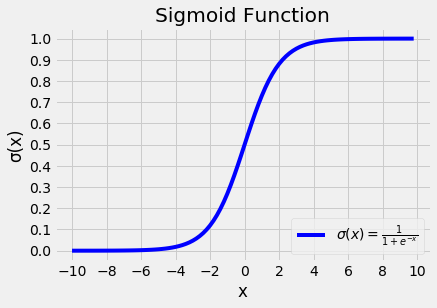

In [29]:
# plot sigmoid function
import matplotlib.pyplot as plt
import numpy as np    

def sigmoid(x):
    return (1/(1+np.exp(-x)))

# create an array named x between -10 to 10 with an interval of 0.2
x = np.arange(-10., 10., 0.2)

# set the style and title
plt.style.use("fivethirtyeight")
plt.title('Sigmoid Function')

# write the Sigmoid formula
# plt.text(4, 0.8, r'$σ(x)=\frac{1}{1+e^{-x}}$', fontsize=15)

# prepare the plot, associate the color b(lue) and the label 
#plt.plot(x, sigmoid(x), 'b', label='arange(-10., 10., 0.2)')
plt.plot(x, sigmoid(x), 'b', label= r'$σ(x)=\frac{1}{1+e^{-x}}$')

# place the legen boc in bottom right of the graph
plt.legend(loc='lower right')


#resize the X and Y axes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))

# set lables
plt.xlabel("x")
plt.ylabel("σ(x)")

# create the graph
plt.show()

The sigmoid function has values very close to either 0 or 1 across most of its domain. This fact makes it suitable for application in classification methods.

The code below plots an image that depicts the natural logarithm log(𝑥) of some variable 𝑥, for values of 𝑥 between 0 and 1:

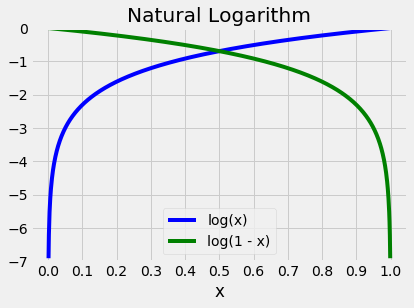

In [43]:
# plot log(x) function
import matplotlib.pyplot as plt
import numpy as np    

# create an array named x between -10 to 10 with an interval of 0.001
x = np.arange(0., 1., 0.001)
x = x[1:]

# set the style and title
plt.style.use("fivethirtyeight")
plt.title('Natural Logarithm')

# prepare the plot, associate the color r(ed) or b(lue) and the label 
plt.plot(x, np.log(x), 'b', label='log(x)')
plt.plot(x, np.log(1 - x), 'g', label='log(1 - x)')

# place the legen boc in bottom right of the graph
plt.legend(loc='lower center')


#resize the X and Y axes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(0.1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

# set lables
plt.xlabel("x")

# set y limit
plt.ylim([-7, 0])

# create the graph
plt.show()

As 𝑥 approaches zero, the natural logarithm of 𝑥 drops towards negative infinity. When 𝑥 = 1, log(𝑥) is 0. The opposite is true for log(1 − 𝑥).

Note that you’ll often find the natural logarithm denoted with ln instead of log. In Python, math.log(x) and numpy.log(x) represent the natural logarithm of x, so you’ll follow this notation in this tutorial.

### Problem Formulation
In this tutorial, you’ll see an explanation for the common case of logistic regression applied to binary classification. When you’re implementing the logistic regression of some dependent variable 𝑦 on the set of independent variables 𝐱 = (𝑥₁, …, 𝑥ᵣ), where 𝑟 is the number of predictors ( or inputs), you start with the known values of the predictors 𝐱ᵢ and the corresponding actual response (or output) 𝑦ᵢ for each observation 𝑖 = 1, …, 𝑛.

Your goal is to find the logistic regression function 𝑝(𝐱) such that the predicted responses 𝑝(𝐱ᵢ) are as close as possible to the actual response 𝑦ᵢ for each observation 𝑖 = 1, …, 𝑛. Remember that the actual response can be only 0 or 1 in binary classification problems! This means that each 𝑝(𝐱ᵢ) should be close to either 0 or 1. That’s why it’s convenient to use the sigmoid function.

Once you have the logistic regression function 𝑝(𝐱), you can use it to predict the outputs for new and unseen inputs, assuming that the underlying mathematical dependence is unchanged.

### Methodology
Logistic regression is a linear classifier, so you’ll use a linear function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ, also called the logit. The variables 𝑏₀, 𝑏₁, …, 𝑏ᵣ are the estimators of the regression coefficients, which are also called the predicted weights or just coefficients.

The logistic regression function 𝑝(𝐱) is the sigmoid function of 𝑓(𝐱): 𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱)). As such, it’s often close to either 0 or 1. The function 𝑝(𝐱) is often interpreted as the predicted probability that the output for a given 𝐱 is equal to 1. Therefore, 1 − 𝑝(𝑥) is the probability that the output is 0.

Logistic regression determines the best predicted weights 𝑏₀, 𝑏₁, …, 𝑏ᵣ such that the function 𝑝(𝐱) is as close as possible to all actual responses 𝑦ᵢ, 𝑖 = 1, …, 𝑛, where 𝑛 is the number of observations. The process of calculating the best weights using available observations is called model training or fitting.

To get the best weights, you usually maximize the log-likelihood function (LLF) for all observations 𝑖 = 1, …, 𝑛. This method is called the maximum likelihood estimation and is represented by the equation LLF = Σᵢ(𝑦ᵢ log(𝑝(𝐱ᵢ)) + (1 − 𝑦ᵢ) log(1 − 𝑝(𝐱ᵢ))).

When 𝑦ᵢ = 0, the LLF for the corresponding observation is equal to log(1 − 𝑝(𝐱ᵢ)). If 𝑝(𝐱ᵢ) is close to 𝑦ᵢ = 0, then log(1 − 𝑝(𝐱ᵢ)) is close to 0. This is the result you want. If 𝑝(𝐱ᵢ) is far from 0, then log(1 − 𝑝(𝐱ᵢ)) drops significantly. You don’t want that result because your goal is to obtain the maximum LLF. Similarly, when 𝑦ᵢ = 1, the LLF for that observation is 𝑦ᵢ log(𝑝(𝐱ᵢ)). If 𝑝(𝐱ᵢ) is close to 𝑦ᵢ = 1, then log(𝑝(𝐱ᵢ)) is close to 0. If 𝑝(𝐱ᵢ) is far from 1, then log(𝑝(𝐱ᵢ)) is a large negative number.

There are several mathematical approaches that will calculate the best weights that correspond to the maximum LLF, but that’s beyond the scope of this tutorial. For now, you can leave these details to the logistic regression Python libraries you’ll learn to use here!

Once you determine the best weights that define the function 𝑝(𝐱), you can get the predicted outputs 𝑝(𝐱ᵢ) for any given input 𝐱ᵢ. For each observation 𝑖 = 1, …, 𝑛, the predicted output is 1 if 𝑝(𝐱ᵢ) > 0.5 and 0 otherwise. The threshold doesn’t have to be 0.5, but it usually is. You might define a lower or higher value if that’s more convenient for your situation.

There’s one more important relationship between 𝑝(𝐱) and 𝑓(𝐱), which is that log(𝑝(𝐱) / (1 − 𝑝(𝐱))) = 𝑓(𝐱). This equality explains why 𝑓(𝐱) is the [logit](https://en.wikipedia.org/wiki/Logit). It implies that 𝑝(𝐱) = 0.5 when 𝑓(𝐱) = 0 and that the predicted output is 1 if 𝑓(𝐱) > 0 and 0 otherwise.

### Classification Performance
Binary classification has [four possible types of results](https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative):
- True negatives: correctly predicted negatives (zeros)
- True positives: correctly predicted positives (ones)
- False negatives: incorrectly predicted negatives (zeros)
- False positives: incorrectly predicted positives (ones)

You usually evaluate the performance of your classifier by comparing the actual and predicted outputs and counting the correct and incorrect predictions.

The most straightforward indicator of **classification accuracy** is the ratio of the number of correct predictions to the total number of predictions (or observations). Other indicators of binary classifiers include the following:
- The [positive predictive value](https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values#Positive_predictive_value) is the ratio of the number of true positives to the sum of the numbers of true and false positives.
- The [negative predictive value](https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values#Negative_predictive_value) is the ratio of the number of true negatives to the sum of the numbers of true and false negatives.
- The [sensitivity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Sensitivity) (also known as recall or true positive rate) is the ratio of the number of true positives to the number of actual positives.
- The [specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Specificity) (or true negative rate) is the ratio of the number of true negatives to the number of actual negatives.

The most suitable indicator depends on the problem of interest. In this tutorial, you’ll use the most straightforward form of classification accuracy.



### Single-Variate Logistic Regression
Single-variate logistic regression is the most straightforward case of logistic regression. There is only one independent variable (or feature), which is 𝐱 = 𝑥. 

This figure illustrates single-variate logistic regression:

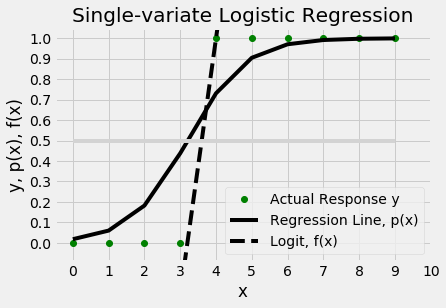

In [104]:
# plot single-variate logistic regression
import matplotlib.pyplot as plt
import numpy as np    

# create the observations
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])


# set the style and title
plt.style.use("fivethirtyeight")
plt.title('Single-variate Logistic Regression')

# prepare the plot
plt.plot(x, y, 'go', label='Actual Response y')
plt.plot(x, 1 / (1 + np.exp(4 - 1.25 * x)), '-', color='black', label='Regression Line, p(x)')
plt.plot(x, 1.25 * x - 4, '--', color='black', label='Logit, f(x)')
plt.plot(x, 0 * x + 0.5, 'lightgray')

# place the legen boc in bottom right of the graph
plt.legend(loc='lower right')

#resize the X and Y axes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))

# set lables
plt.xlabel("x")
plt.ylabel("y, p(x), f(x)")

# set x, y limit
plt.xlim([-0.5, 10])
plt.ylim([-0.09, 1.05])

# create the graph
plt.show()

Here, you have a given set of input-output (or 𝑥-𝑦) pairs, represented by green circles. These are your observations. Remember that 𝑦 can only be 0 or 1. For example, the leftmost green circle has the input 𝑥 = 0 and the actual output 𝑦 = 0. The rightmost observation has 𝑥 = 9 and 𝑦 = 1.

Logistic regression finds the weights 𝑏₀ and 𝑏₁ that correspond to the maximum LLF. These weights define the logit 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥, which is the dashed black line. They also define the predicted probability 𝑝(𝑥) = 1 / (1 + exp(−𝑓(𝑥))), shown here as the full black line. In this case, the threshold 𝑝(𝑥) = 0.5 and 𝑓(𝑥) = 0 corresponds to the value of 𝑥 slightly higher than 3. This value is the limit between the inputs with the predicted outputs of 0 and 1.

### Multi-Variate Logistic Regression
Multi-variate logistic regression has more than one input variable. This figure shows the classification with two independent variables, 𝑥₁ and 𝑥₂:

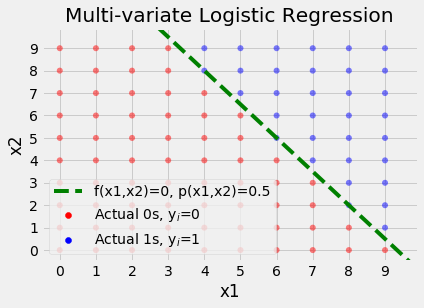

In [30]:
# plot multi-variate logistic regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# set the style and title
plt.style.use("fivethirtyeight")
plt.title('Multi-variate Logistic Regression')

a = np.matrix('''
	0 0 0 0 1 1 1 1 1 1; 
	0 0 0 0 1 1 1 1 1 1; 
	0 0 0 0 0 1 1 1 1 1; 
	0 0 0 0 0 0 1 1 1 1; 
	0 0 0 0 0 0 1 1 1 1; 
	0 0 0 0 0 0 0 1 1 1; 
	0 0 0 0 0 0 0 0 1 1; 
	0 0 0 0 0 0 0 0 1 1; 
	0 0 0 0 0 0 0 0 0 1; 
	0 0 0 0 0 0 0 0 0 0 
	''')
a = np.flip(a, 0)

df = pd.DataFrame(a)
df['x2'] = df.index
df = df.melt(id_vars=['x2'], var_name = 'x1', value_name = 'y').sort_values(by=['x2','x1']).reset_index(drop=True)

x2, x1, y = df['x2'], df['x1'], df['y']

# Create the colormap
cm = LinearSegmentedColormap.from_list(
        'clist', 
        [(1, 0, 0), (0, 1, 0), (0, 0, 1)],  # R -> G -> B
        N=2)
    
# Scatter the points, using size and color but no label
plt.scatter(x1, x2, c=y, cmap=cm, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')

xx = np.arange(11).reshape(-1, 1)
plt.plot(xx, -1.5 * xx + 14, 'g--', label='f(x1,x2)=0, p(x1,x2)=0.5')

# Here we create a legend:
# we'll plot empty lists with the desired size and label
plt.scatter([], [], c='r', marker='o', label='Actual 0s, y$_{i}$=0')
plt.scatter([], [], c='b', label='Actual 1s, y$_{i}$=1')
#plt.plot([], [], c='g', label='f(x1,x2)=0, p(x1,x2)=0.5')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1)
plt.legend(loc='lower left')

#resize the X and Y axes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

# set lables
plt.xlabel("x1")
plt.ylabel("x2")

# set x, y limit
plt.xlim([-0.5, 9.9])
plt.ylim([-0.5, 9.9])

plt.show()

The graph is different from the single-variate graph because both axes represent the inputs. The outputs also differ in color. The red circles show the observations classified as zeros, while the blue circles are those classified as ones.

Logistic regression determines the weights 𝑏₀, 𝑏₁, and 𝑏₂ that maximize the LLF. Once you have 𝑏₀, 𝑏₁, and 𝑏₂, you can get:
- The logit 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂
- The probabilities 𝑝(𝑥₁, 𝑥₂) = 1 / (1 + exp(−𝑓(𝑥₁, 𝑥₂)))

The dash-dotted green line linearly separates the two classes. This line corresponds to 𝑝(𝑥₁, 𝑥₂) = 0.5 and 𝑓(𝑥₁, 𝑥₂) = 0.

### Regularization
[Overfitting](https://realpython.com/linear-regression-in-python/#underfitting-and-overfitting) is one of the most serious kinds of problems related to machine learning. It occurs when a model learns the training data too well. The model then learns not only the relationships among data but also the noise in the dataset. Overfitted models tend to have good performance with the data used to fit them (the training data), but they behave poorly with unseen data (or test data, which is data not used to fit the model).

Overfitting usually occurs with complex models. Regularization normally tries to reduce or penalize the complexity of the model. Regularization techniques applied with logistic regression mostly tend to penalize large coefficients 𝑏₀, 𝑏₁, …, 𝑏ᵣ:
- L1 regularization penalizes the LLF with the scaled sum of the absolute values of the weights: |𝑏₀|+|𝑏₁|+⋯+|𝑏ᵣ|.
- L2 regularization penalizes the LLF with the scaled sum of the squares of the weights: 𝑏₀²+𝑏₁²+⋯+𝑏ᵣ².
- Elastic-net regularization is a linear combination of L1 and L2 regularization.

Regularization can significantly improve model performance on unseen data.

## Logistic Regression in Python
Now that you understand the fundamentals, you’re ready to apply the appropriate packages as well as their functions and classes to perform logistic regression in Python. In this section, you’ll see the following:
- A summary of Python packages for logistic regression (NumPy, scikit-learn, StatsModels, and Matplotlib)
- Two illustrative examples of logistic regression solved with scikit-learn
- One conceptual example solved with StatsModels
- One real-world example of classifying handwritten digits

Let’s start implementing logistic regression in Python!

### Logistic Regression Python Packages
There are several packages you’ll need for logistic regression in Python. All of them are free and open-source, with lots of available resources. First, you’ll need NumPy, which is a fundamental package for scientific and numerical computing in Python. NumPy is useful and popular because it enables high-performance operations on single- and multi-dimensional arrays.

NumPy has many useful array routines. It allows you to write elegant and compact code, and it works well with many Python packages. If you want to learn NumPy, then you can start with the [official user guide](https://docs.scipy.org/doc/numpy/user/index.html). The [NumPy Reference](https://docs.scipy.org/doc/numpy/reference/) also provides comprehensive documentation on its functions, classes, and methods.

Note: To learn more about NumPy performance and the other benefits it can offer, check out [Pure Python vs NumPy vs TensorFlow Performance Comparison](https://realpython.com/numpy-tensorflow-performance/) and [Look Ma, No For-Loops: Array Programming With NumPy](https://realpython.com/numpy-array-programming/).

Another Python package you’ll use is scikit-learn. This is one of the most popular data science and machine learning libraries. You can use scikit-learn to perform various functions:
- Preprocess data
- Reduce the dimensionality of problems
- Validate models
- Select the most appropriate model
- Solve regression and classification problems
- Implement cluster analysis

You’ll find useful information on the [official scikit-learn website](https://scikit-learn.org/stable/), where you might want to read about [generalized linear models](https://scikit-learn.org/stable/modules/linear_model.html) and [logistic regression implementation](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression). If you need functionality that scikit-learn can’t offer, then you might find StatsModels useful. It’s a powerful Python library for statistical analysis. You can find more information on the [official StatsModels website](https://www.statsmodels.org/stable/index.html).

Finally, you’ll use Matplotlib to visualize the results of your classification. This is a Python library that’s comprehensive and widely used for high-quality plotting. For additional information, you can check the [official website](https://matplotlib.org/) and [user guide](https://matplotlib.org/users/index.html). There are several resources for learning Matplotlib you might find useful, like the [official tutorials](https://matplotlib.org/tutorials/index.html), the [Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib), and [Python Plotting With Matplotlib (Guide)](https://realpython.com/python-matplotlib-guide/).

### Logistic Regression in Python With scikit-learn: Example 1
The first example is related to a single-variate binary classification problem. This is the most straightforward kind of classification problem. There are several general steps you’ll take when you’re preparing your classification models:
- Import packages, functions, and classes
- Get data to work with and, if appropriate, transform it
- Create a classification model and train (or fit) it with your existing data
- Evaluate your model to see if its performance is satisfactory

A sufficiently good model that you define can be used to make further predictions related to new, unseen data. The above procedure is the same for classification and regression.

#### Step 1: Import Packages, Functions, and Classes
First, you have to [import](https://realpython.com/absolute-vs-relative-python-imports/) Matplotlib for visualization and NumPy for array operations. You’ll also need LogisticRegression, classification_report(), and confusion_matrix() from scikit-learn:

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

ow you’ve imported everything you need for logistic regression in Python with scikit-learn!

#### Step 2: Get Data
In practice, you’ll usually have some data to work with. For the purpose of this example, let’s just create arrays for the input (𝑥) and output (𝑦) values:

In [101]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

The input and output should be NumPy arrays (instances of the class numpy.ndarray) or similar objects. numpy.arange() creates an array of consecutive, equally-spaced values within a given range. For more information on this function, check the [official documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) or [NumPy arange(): How to Use np.arange()](https://realpython.com/how-to-use-numpy-arange/).

The array x is required to be two-dimensional. It should have one column for each input, and the number of rows should be equal to the number of observations. To make x two-dimensional, you apply .reshape() with the arguments -1 to get as many rows as needed and 1 to get one column. For more information on .reshape(), you can check out the [official documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.reshape.html). Here’s how x and y look now:

In [35]:
x.shape

(10, 1)

In [36]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [37]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [38]:
y.shape

(10,)

x has two dimensions:
- One column for a single input
- Ten rows, each corresponding to one observation

y is one-dimensional with ten items. Again, each item corresponds to one observation. It contains only zeros and ones since this is a binary classification problem.

#### Step 3: Create a Model and Train It
Once you have the input and output prepared, you can create and define your classification model. You’re going to represent it with an instance of the class LogisticRegression:


In [114]:
model = LogisticRegression(solver='liblinear', random_state=0)

The above statement creates an instance of LogisticRegression and binds its references to the variable model. LogisticRegression has several optional parameters that define the behavior of the model and approach:
- penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.
- dual is a Boolean (False by default) that decides whether to use primal (when False) or dual formulation (when True).
- tol is a floating-point number (0.0001 by default) that defines the tolerance for stopping the procedure.
- C is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.
- fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (when True) or consider it equal to zero (when False).
- intercept_scaling is a floating-point number (1.0 by default) that defines the scaling of the intercept 𝑏₀.
- class_weight is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.
- random_state is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.
- solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
- max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.
- multi_class is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.
- verbose is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers.
- warm_start is a Boolean (False by default) that decides whether to reuse the previously obtained solution.
- n_jobs is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.
- l1_ratio is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

You should carefully match the solver and regularization method for several reasons:
- 'liblinear' solver doesn’t work without regularization.
- 'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
- 'saga' is the only solver that supports elastic-net regularization.

Once the model is created, you need to fit (or train) it. Model fitting is the process of determining the coefficients 𝑏₀, 𝑏₁, …, 𝑏ᵣ that correspond to the best value of the cost function. You fit the model with .fit():

In [115]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

.fit() takes x, y, and possibly observation-related weights. Then it fits the model and returns the model instance itself.

You can use the fact that .fit() returns the model instance and chain the last two statements. They are equivalent to the following line of code:

In [104]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

At this point, you have the classification model defined.

You can quickly get the attributes of your model. For example, the attribute .classes_ represents the array of distinct values that y takes:

In [48]:
model.classes_

array([0, 1])

This is the example of binary classification, and y can be 0 or 1, as indicated above.

You can also get the value of the slope 𝑏₁ and the intercept 𝑏₀ of the linear function 𝑓 like so:

In [52]:
model.intercept_ , model.coef_ 

(array([-1.04608067]), array([[0.51491375]]))

As you can see, 𝑏₀ is given inside a one-dimensional array, while 𝑏₁ is inside a two-dimensional array. You use the attributes .intercept_ and .coef_ to get these results.

#### Step 4: Evaluate the Model
Once a model is defined, you can check its performance with .predict_proba(), which returns the matrix of probabilities that the predicted output is equal to zero or one:

In [53]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

You can get the actual predictions, based on the probability matrix and the values of 𝑝(𝑥), with .predict():

In [107]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

This function returns the predicted output values as a one-dimensional array.

The figure below illustrates the input, output, and classification results:

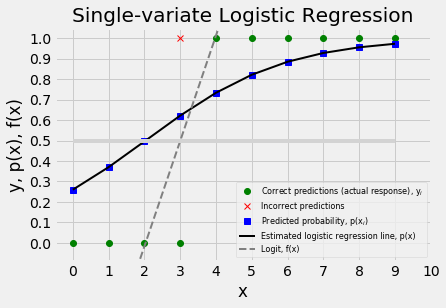

In [116]:
# plot single-variate logistic regression
import matplotlib.pyplot as plt
import numpy as np    

# set the style and title
plt.style.use("fivethirtyeight")
plt.title('Single-variate Logistic Regression')

# prepare the plot
plt.plot(x, y, 'go', label='Correct predictions (actual response), y$_{i}$')

# check errors and plot
ypred = model.predict(x)
xerr = []
yerr = []
for i in x:
    if ypred[i]!=y[i]:
        xerr.append(i)
        yerr.append(ypred[i])
if len(yerr) > 0:
    plt.plot(xerr, yerr, 'rx', label='Incorrect predictions')

plt.plot(x, model.predict_proba(x)[:, 1], 'bs', label='Predicted probability, p(x$_{i}$)')
plt.plot(x, 1 / (1 + np.exp(- model.intercept_[0] - model.coef_[0][0] * x)), color='black', linewidth=2, label='Estimated logistic regression line, p(x)')
plt.plot(x, model.intercept_[0] + model.coef_[0][0] * x, '--', color='gray', linewidth=2, label='Logit, f(x)')
plt.plot(x, 0 * x + 0.5, 'lightgray')

# place the legen boc in bottom right of the graph
plt.legend(loc='lower right', prop={'size': 8})

#resize the X and Y axes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))

# set lables
plt.xlabel("x")
plt.ylabel("y, p(x), f(x)")

# set x, y limit
plt.xlim([-0.5, 10])
plt.ylim([-0.09, 1.05])

# create the graph
plt.show()

The green circles represent the actual responses as well as the correct predictions. The red × shows the incorrect prediction. The full black line is the estimated logistic regression line 𝑝(𝑥). The blue squares are the points on this line that correspond to 𝑥 and the values in the second column of the probability matrix. The gray dashed line is the logit 𝑓(𝑥).

The value of 𝑥 slightly above 2 corresponds to the threshold 𝑝(𝑥)=0.5, which is 𝑓(𝑥)=0. This value of 𝑥 is the boundary between the points that are classified as zeros and those predicted as ones.

For example, the first point has input 𝑥=0, actual output 𝑦=0, probability 𝑝=0.26, and a predicted value of 0. The second point has 𝑥=1, 𝑦=0, 𝑝=0.37, and a prediction of 0. Only the fourth point has the actual output 𝑦=0 and the probability higher than 0.5 (at 𝑝=0.62), so it’s wrongly classified as 1. All other values are predicted correctly.

When you have nine out of ten observations classified correctly, the accuracy of your model is equal to 9/10=0.9, which you can obtain with .score():

In [86]:
model.score(x, y)

0.9

.score() takes the input and output as arguments and returns the ratio of the number of correct predictions to the number of observations.

You can get more information on the accuracy of the model with a confusion matrix. In the case of binary classification, the confusion matrix shows the numbers of the following:
- True negatives in the upper-left position
- False negatives in the lower-left position
- False positives in the upper-right position
- True positives in the lower-right position

To create the confusion matrix, you can use confusion_matrix() and provide the actual and predicted outputs as the arguments:

In [87]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]])

The obtained matrix shows the following:
- Three true negative predictions: The first three observations are zeros predicted correctly.
- No false negative predictions: These are the ones wrongly predicted as zeros.
- One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.
- Six true positive predictions: The last six observations are ones predicted correctly.

It’s often useful to visualize the confusion matrix. You can do that with .imshow() from Matplotlib, which accepts the confusion matrix as the argument:

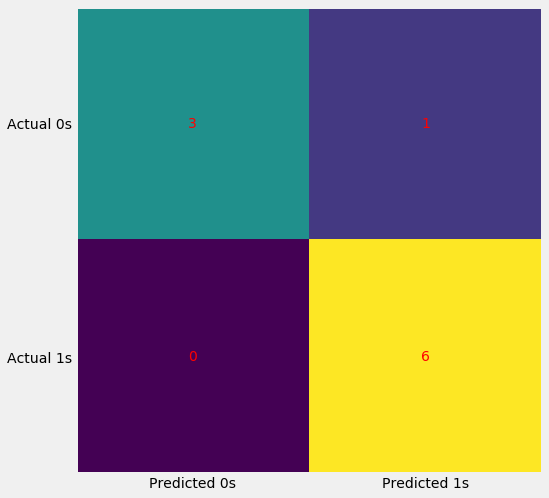

In [88]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

The code above creates a heatmap that represents the confusion matrix. 

In this figure, different colors represent different numbers and similar colors represent similar numbers. Heatmaps are a nice and convenient way to represent a matrix. To learn more about them, check out the Matplotlib documentation on [Creating Annotated Heatmaps](https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [.imshow()](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow).

You can get a more comprehensive report on the classification with classification_report():

In [89]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



This function also takes the actual and predicted outputs as arguments. It returns a report on the classification as a dictionary if you provide output_dict=True or a string otherwise.

**Note**: It’s usually better to evaluate your model with the data you didn’t use for training. That’s how you avoid bias and detect overfitting. You’ll see an example later in this tutorial.

For more information on LogisticRegression, check out the [official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). In addition, scikit-learn offers a similar class [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html), which is more suitable for [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). You can also check out the official documentation to learn more about [classification reports](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and [confusion matrices](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

#### Improve the Model
You can improve your model by setting different parameters. For example, let’s work with the regularization strength C equal to 10.0, instead of the default value of 1.0:

In [110]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

Now you have another model with different parameters. It’s also going to have a different probability matrix and a different set of coefficients and predictions:

In [111]:
model.intercept_ , model.coef_

(array([-3.51335372]), array([[1.12066084]]))

In [93]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [112]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

As you can see, the absolute values of the intercept 𝑏₀ and the coefficient 𝑏₁ are larger. This is the case because the larger value of C means weaker regularization, or weaker penalization related to high values of 𝑏₀ and 𝑏₁.

Different values of 𝑏₀ and 𝑏₁ imply a change of the logit 𝑓(𝑥), different values of the probabilities 𝑝(𝑥), a different shape of the regression line, and possibly changes in other predicted outputs and classification performance. The boundary value of 𝑥 for which 𝑝(𝑥)=0.5 and 𝑓(𝑥)=0 is higher now. It’s above 3. In this case, you obtain all true predictions, as shown by the accuracy, confusion matrix, and classification report:

In [95]:
model.score(x, y)

1.0

In [96]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]])

In [97]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



The score (or accuracy) of 1 and the zeros in the lower-left and upper-right fields of the confusion matrix indicate that the actual and predicted outputs are the same. That’s also shown with the figure below:

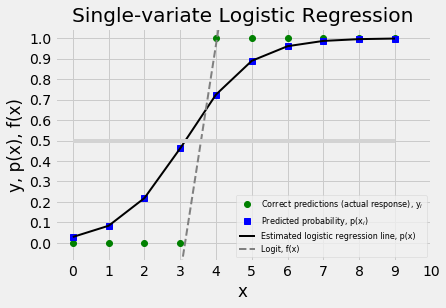

In [113]:
# plot single-variate logistic regression
import matplotlib.pyplot as plt
import numpy as np    

# set the style and title
plt.style.use("fivethirtyeight")
plt.title('Single-variate Logistic Regression')

# prepare the plot
plt.plot(x, y, 'go', label='Correct predictions (actual response), y$_{i}$')

# check errors and plot
ypred = model.predict(x)
xerr = []
yerr = []
for i in x:
    if ypred[i]!=y[i]:
        xerr.append(i)
        yerr.append(ypred[i])

if len(yerr) > 0:
    plt.plot(xerr, yerr, 'rx', label='Incorrect predictions')

plt.plot(x, model.predict_proba(x)[:, 1], 'bs', label='Predicted probability, p(x$_{i}$)')
plt.plot(x, 1 / (1 + np.exp(- model.intercept_[0] - model.coef_[0][0] * x)), color='black', linewidth=2, label='Estimated logistic regression line, p(x)')
plt.plot(x, model.intercept_[0] + model.coef_[0][0] * x, '--', color='gray', linewidth=2, label='Logit, f(x)')
plt.plot(x, 0 * x + 0.5, 'lightgray')

# place the legen boc in bottom right of the graph
plt.legend(loc='lower right', prop={'size': 8})

#resize the X and Y axes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))

# set lables
plt.xlabel("x")
plt.ylabel("y, p(x), f(x)")

# set x, y limit
plt.xlim([-0.5, 10])
plt.ylim([-0.09, 1.05])

# create the graph
plt.show()

This figure illustrates that the estimated regression line now has a different shape and that the fourth point is correctly classified as 0. There isn’t a red ×, so there is no wrong prediction.

### Logistic Regression in Python With scikit-learn: Example 2
Let’s solve another classification problem. It’s similar to the previous one, except that the output differs in the second value. The code is similar to the previous case:

In [117]:
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

This classification code sample generates the following results:

In [118]:
print('x:', x, sep='\n')

x:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [119]:
print('y:', y, sep='\n', end='\n\n')

y:
[0 1 0 0 1 1 1 1 1 1]



In [120]:
print('intercept:', model.intercept_)

intercept: [-1.51632619]


In [121]:
print('coef:', model.coef_, end='\n\n')

coef: [[0.703457]]



In [122]:
print('p_pred:', p_pred, sep='\n', end='\n\n')

p_pred:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]



In [123]:
print('y_pred:', y_pred, end='\n\n')

y_pred: [0 0 0 1 1 1 1 1 1 1]



In [124]:
print('score_:', score_, end='\n\n')

score_: 0.8



In [125]:
print('conf_m:', conf_m, sep='\n', end='\n\n')

conf_m:
[[2 1]
 [1 6]]



In [126]:
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



In this case, the score (or accuracy) is 0.8. There are two observations classified incorrectly. One of them is a false negative, while the other is a false positive.

The figure below illustrates this example with eight correct and two incorrect predictions:

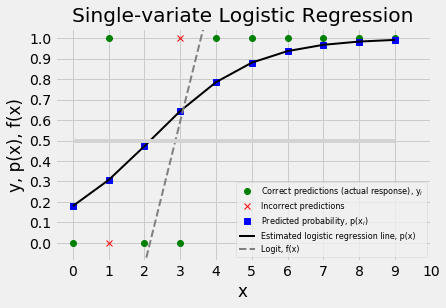

In [127]:
# plot single-variate logistic regression
import matplotlib.pyplot as plt
import numpy as np    

# set the style and title
plt.style.use("fivethirtyeight")
plt.title('Single-variate Logistic Regression')

# prepare the plot
plt.plot(x, y, 'go', label='Correct predictions (actual response), y$_{i}$')

# check errors and plot
ypred = model.predict(x)
xerr = []
yerr = []
for i in x:
    if ypred[i]!=y[i]:
        xerr.append(i)
        yerr.append(ypred[i])

if len(yerr) > 0:
    plt.plot(xerr, yerr, 'rx', label='Incorrect predictions')

plt.plot(x, model.predict_proba(x)[:, 1], 'bs', label='Predicted probability, p(x$_{i}$)')
plt.plot(x, 1 / (1 + np.exp(- model.intercept_[0] - model.coef_[0][0] * x)), color='black', linewidth=2, label='Estimated logistic regression line, p(x)')
plt.plot(x, model.intercept_[0] + model.coef_[0][0] * x, '--', color='gray', linewidth=2, label='Logit, f(x)')
plt.plot(x, 0 * x + 0.5, 'lightgray')

# place the legen boc in bottom right of the graph
plt.legend(loc='lower right', prop={'size': 8})

#resize the X and Y axes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))

# set lables
plt.xlabel("x")
plt.ylabel("y, p(x), f(x)")

# set x, y limit
plt.xlim([-0.5, 10])
plt.ylim([-0.09, 1.05])

# create the graph
plt.show()

This figure reveals one important characteristic of this example. Unlike the previous one, this problem is **not linearly separable**. That means you can’t find a value of 𝑥 and draw a straight line to separate the observations with 𝑦=0 and those with 𝑦=1. There is no such line. Keep in mind that logistic regression is essentially a linear classifier, so you theoretically can’t make a logistic regression model with an accuracy of 1 in this case.

### Logistic Regression in Python With StatsModels: Example
You can also implement logistic regression in Python with the StatsModels package. Typically, you want this when you need more statistical details related to models and results. The procedure is similar to that of scikit-learn.

#### Step 1: Import Packages
All you need to import is NumPy and statsmodels.api:

In [129]:
!pip install statsmodels

     |████████████████████████████████| 9.5 MB 10.6 MB/s eta 0:00:01     |█████                           | 1.5 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 30.8 MB/s eta 0:00:01


In [130]:
import numpy as np
import statsmodels.api as sm

Now you have the packages you need.

#### Step 2: Get Data
You can get the inputs and output the same way as you did with scikit-learn. However, StatsModels doesn’t take the intercept 𝑏₀ into account, and you need to include the additional column of ones in x. You do that with add_constant():

In [135]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x)

add_constant() takes the array x as the argument and returns a new array with the additional column of ones. This is how x and y look:

In [136]:
x

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [137]:
y

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

This is your data. The first column of x corresponds to the intercept 𝑏₀. The second column contains the original values of x.

#### Step 3: Create a Model and Train It
Your logistic regression model is going to be an instance of the class statsmodels.discrete.discrete_model.Logit. This is how you can create one:

In [138]:
model = sm.Logit(y, x)

Note that the first argument here is y, followed by x.

Now, you’ve created your model and you should fit it with the existing data. You do that with .fit() or, if you want to apply L1 regularization, with .fit_regularized():

In [139]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


The model is now ready, and the variable result holds useful data. For example, you can obtain the values of 𝑏₀ and 𝑏₁ with .params:

In [140]:
result.params

array([-1.972805  ,  0.82240094])

The first element of the obtained array is the intercept 𝑏₀, while the second is the slope 𝑏₁. For more information, you can look at the official documentation on [Logit](https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html), as well as [.fit()](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit.html) and [.fit_regularized()](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit.html).

#### Step 4: Evaluate the Model
You can use results to obtain the probabilities of the predicted outputs being equal to one:

In [141]:
result.predict(x)

array([0.12208792, 0.24041529, 0.41872657, 0.62114189, 0.78864861,
       0.89465521, 0.95080891, 0.97777369, 0.99011108, 0.99563083])

These probabilities are calculated with .predict(). You can use their values to get the actual predicted outputs:

In [142]:
(result.predict(x) >= 0.5).astype(int)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

The obtained array contains the predicted output values. As you can see, 𝑏₀, 𝑏₁, and the probabilities obtained with scikit-learn and StatsModels are different. This is the consequence of applying different iterative and approximate procedures and parameters. However, in this case, you obtain the same predicted outputs as when you used scikit-learn.

You can obtain the confusion matrix with .pred_table():

In [143]:
result.pred_table()

array([[2., 1.],
       [1., 6.]])

This example is the same as when you used scikit-learn because the predicted ouptuts are equal. The confusion matrices you obtained with StatsModels and scikit-learn differ in the types of their elements (floating-point numbers and integers).

.summary() and .summary2() get output data that you might find useful in some circumstances:

In [144]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Jan 2021   Pseudo R-squ.:                  0.4263
Time:                        05:11:57   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
==============================================================================
"""

In [145]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.426   
Dependent Variable: y                AIC:              11.0094 
Date:               2021-01-10 05:12 BIC:              11.6146 
No. Observations:   10               Log-Likelihood:   -3.5047 
Df Model:           1                LL-Null:          -6.1086 
Df Residuals:       8                LLR p-value:      0.022485
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const    -1.9728     1.7366   -1.1360   0.2560   -5.3765   1.4309
x1        0.8224     0.5281    1.5572   0.1194   -0.2127   1.8575
===============================================================

"""

These are detailed reports with values that you can obtain with appropriate methods and attributes. For more information, check out the official documentation related to [LogitResults](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.html).

### Logistic Regression in Python: Handwriting Recognition
The previous examples illustrated the implementation of logistic regression in Python, as well as some details related to this method. The next example will show you how to use logistic regression to solve a real-world classification problem. The approach is very similar to what you’ve already seen, but with a larger dataset and several additional concerns.

This example is about image recognition. To be more precise, you’ll work on the recognition of handwritten digits. You’ll use a dataset with 1797 observations, each of which is an image of one handwritten digit. Each image has 64 px, with a width of 8 px and a height of 8 px.

**Note**: To learn more about this dataset, check the [official documentation](https://scikit-learn.org/stable/datasets/index.html#digits-dataset).

The inputs (𝐱) are vectors with 64 dimensions or values. Each input vector describes one image. Each of the 64 values represents one pixel of the image. The input values are the integers between 0 and 16, depending on the shade of gray for the corresponding pixel. The output (𝑦) for each observation is an integer between 0 and 9, consistent with the digit on the image. There are ten classes in total, each corresponding to one image.

#### Step 1: Import Packages
You’ll need to import Matplotlib, NumPy, and several functions and classes from scikit-learn:

In [146]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

That’s it! You have all the functionality you need to perform classification.

#### Step 2a: Get Data
You can grab the dataset directly from scikit-learn with load_digits(). It returns a tuple of the inputs and output:

In [147]:
x, y = load_digits(return_X_y=True)

Now you have the data. This is how x and y look:

In [148]:
x.shape

(1797, 64)

In [149]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [150]:
y.shape

(1797,)

In [151]:
y

array([0, 1, 2, ..., 8, 9, 8])

That’s your data to work with. x is a multi-dimensional array with 1797 rows and 64 columns. It contains integers from 0 to 16. y is an one-dimensional array with 1797 integers between 0 and 9.

#### Step 2b: Split Data
It’s a good and widely-adopted practice to split the dataset you’re working with into two subsets. These are the training set and the test set. This split is usually performed randomly. You should use the training set to fit your model. Once the model is fitted, you evaluate its performance with the test set. It’s important not to use the test set in the process of fitting the model. This approach enables an unbiased evaluation of the model.

One way to split your dataset into training and test sets is to [apply train_test_split()](https://realpython.com/train-test-split-python-data/):

In [152]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0)

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) accepts x and y. It also takes test_size, which determines the size of the test set, and random_state to define the state of the pseudo-random number generator, as well as other optional arguments. This function returns a list with four arrays:
- x_train: the part of x used to fit the model
- x_test: the part of x used to evaluate the model
- y_train: the part of y that corresponds to x_train
- y_test: the part of y that corresponds to x_test

Once your data is split, you can forget about x_test and y_test until you define your model.

#### Step 2c: Scale Data
Standardization is the process of transforming data in a way such that the mean of each column becomes equal to zero, and the standard deviation of each column is one. This way, you obtain the same scale for all columns. Take the following steps to standardize your data:
- Calculate the mean and standard deviation for each column.
- Subtract the corresponding mean from each element.
- Divide the obtained difference by the corresponding standard deviation.

It’s a good practice to standardize the input data that you use for logistic regression, although in many cases it’s not necessary. Standardization might improve the performance of your algorithm. It helps if you need to compare and interpret the weights. It’s important when you apply penalization because the algorithm is actually penalizing against the large values of the weights.

You can standardize your inputs by creating an instance of [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and calling .fit_transform() on it:

In [153]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

.fit_transform() fits the instance of StandardScaler to the array passed as the argument, transforms this array, and returns the new, standardized array. Now, x_train is a standardized input array.

#### Step 3: Create a Model and Train It
This step is very similar to the previous examples. The only difference is that you use x_train and y_train subsets to fit the model. Again, you should create an instance of LogisticRegression and call .fit() on it:

In [154]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

When you’re working with problems with more than two classes, you should specify the multi_class parameter of LogisticRegression. It determines how to solve the problem:
- 'ovr' says to make the binary fit for each class.
- 'multinomial' says to apply the multinomial loss fit.

The last statement yields the above output since .fit() returns the model itself.

These are the parameters of your model. It’s now defined and ready for the next step.

#### Step 4: Evaluate the Model
You should evaluate your model similar to what you did in the previous examples, with the difference that you’ll mostly use x_test and y_test, which are the subsets not applied for training. If you’ve decided to standardize x_train, then the obtained model relies on the scaled data, so x_test should be scaled as well with the same instance of StandardScaler:

In [155]:
x_test = scaler.transform(x_test)

That’s how you obtain a new, properly-scaled x_test. In this case, you use .transform(), which only transforms the argument, without fitting the scaler.

You can obtain the predicted outputs with .predict():

In [156]:
y_pred = model.predict(x_test)

The variable y_pred is now bound to an array of the predicted outputs. Note that you use x_test as the argument here.

You can obtain the accuracy with .score():

In [157]:
model.score(x_train, y_train)

0.964509394572025

In [159]:
model.score(x_test, y_test)

0.9416666666666667

Actually, you can get two values of the accuracy, one obtained with the training set and other with the test set. It might be a good idea to compare the two, as a situation where the training set accuracy is much higher might indicate overfitting. The test set accuracy is more relevant for evaluating the performance on unseen data since it’s not biased.

You can get the confusion matrix with confusion_matrix():

In [160]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

The obtained confusion matrix is large. In this case, it has 100 numbers. This is a situation when it might be really useful to visualize it:

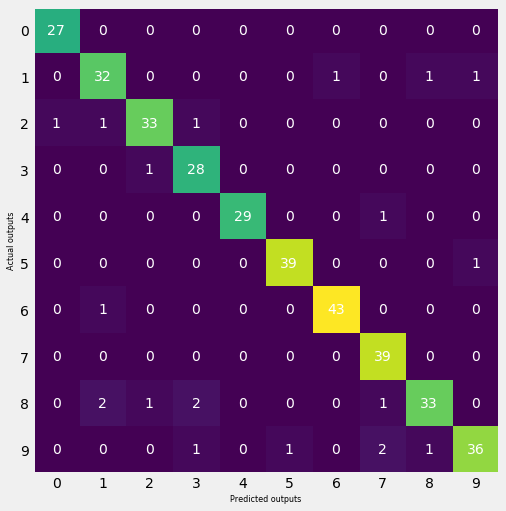

In [162]:
cm = confusion_matrix(y_test, y_pred)
font_size=8
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

The code above produces the figure of the confusion matrix.

This is a heatmap that illustrates the confusion matrix with numbers and colors. You can see that the shades of purple represent small numbers (like 0, 1, or 2), while green and yellow show much larger numbers (27 and above).

The numbers on the main diagonal (27, 32, …, 36) show the number of correct predictions from the test set. For example, there are 27 images with zero, 32 images of one, and so on that are correctly classified. Other numbers correspond to the incorrect predictions. For example, the number 1 in the third row and the first column shows that there is one image with the number 2 incorrectly classified as 0.

Finally, you can get the report on classification as a string or dictionary with classification_report():

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



This report shows additional information, like the support and precision of classifying each digit.

### Beyond Logistic Regression in Python
Logistic regression is a fundamental classification technique. It’s a relatively uncomplicated linear classifier. Despite its simplicity and popularity, there are cases (especially with highly complex models) where logistic regression doesn’t work well. In such circumstances, you can use other classification techniques:
- k-Nearest Neighbors
- Naive Bayes classifiers
- Support Vector Machines
- Decision Trees
- Random Forests
- Neural Networks

Fortunately, there are several comprehensive Python libraries for machine learning that implement these techniques. For example, the package you’ve seen in action here, scikit-learn, implements all of the above-mentioned techniques, with the exception of neural networks.

For all these techniques, scikit-learn offers suitable classes with methods like model.fit(), model.predict_proba(), model.predict(), model.score(), and so on. You can combine them with train_test_split(), confusion_matrix(), classification_report(), and others.

Neural networks (including deep neural networks) have become very popular for classification problems. Libraries like [TensorFlow, PyTorch](https://realpython.com/pytorch-vs-tensorflow/), or [Keras](https://keras.io/) offer suitable, [performant](https://realpython.com/numpy-tensorflow-performance/), and powerful support for these kinds of models.

## Conclusion
You now know what logistic regression is and how you can implement it for classification with Python. You’ve used many open-source packages, including NumPy, to work with arrays and Matplotlib to visualize the results. You also used both scikit-learn and StatsModels to create, fit, evaluate, and apply models.

Generally, logistic regression in Python has a straightforward and user-friendly implementation. It usually consists of these steps:
- Import packages, functions, and classes
- Get data to work with and, if appropriate, transform it
- Create a classification model and train (or fit) it with existing data
- Evaluate your model to see if its performance is satisfactory
- Apply your model to make predictions

You’ve come a long way in understanding one of the most important areas of machine learning! 

## Reference

[source](https://realpython.com/logistic-regression-python/)

### scatter plot matrix

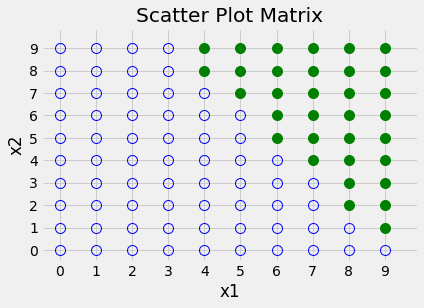

In [32]:
# scatter plot matrix
import matplotlib.pyplot as plt
import numpy as np    

a = np.matrix('''
	0 0 0 0 1 1 1 1 1 1; 
	0 0 0 0 1 1 1 1 1 1; 
	0 0 0 0 0 1 1 1 1 1; 
	0 0 0 0 0 0 1 1 1 1; 
	0 0 0 0 0 0 1 1 1 1; 
	0 0 0 0 0 0 0 1 1 1; 
	0 0 0 0 0 0 0 0 1 1; 
	0 0 0 0 0 0 0 0 1 1; 
	0 0 0 0 0 0 0 0 0 1; 
	0 0 0 0 0 0 0 0 0 0 
	''')
a = np.flip(a, 0)

def scatterplot_matrix(data):
    x2, x1 = data.shape
    # Plot the data.
    colors = np.array(['b', 'g'])
    fillstyles = np.array(['none', 'full'])
    for i in range(0, x1):
        for j in range(0, x2):
            plt.plot(i,j, marker='o', fillstyle=fillstyles[data[j,i]], markersize=10, color=colors[data[j,i]][0][0])

            
# set the style and title
plt.style.use("fivethirtyeight")
plt.title('Scatter Plot Matrix')

# prepare the plot
scatterplot_matrix(a)

#resize the X and Y axes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(1))

# set lables
plt.xlabel("x1")
plt.ylabel("x2")

# set x, y limit
plt.xlim([-0.5, 9.9])
plt.ylim([-0.5, 9.9])

# create the graph
plt.show()
